In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline
from sklearn import linear_model
from sklearn.metrics import balanced_accuracy_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [3]:
# Loading clean listing dataset
file_path = "Resources/listings_data_cleaned.csv"
df = pd.read_csv(file_path)
df.head()

,id,host_id,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,zip
0,2539,2787,9.0,Kensington,40.64529,-73.97238,Private room in rental unit,Private room,2,1.0,1.0,$299.00,30,21,9,4.89,11218
1,5121,7356,2.0,Bedford-Stuyvesant,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,$60.00,30,5,50,4.52,11216
2,45910,204539,7.0,Ridgewood,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,5.0,10.0,$425.00,30,30,13,4.42,11385
3,5136,7378,1.0,Sunset Park,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,2.0,$275.00,21,0,3,5.00,11215
4,77765,417504,30.0,Greenpoint,40.73777,-73.95366,Room in boutique hotel,Hotel room,2,1.0,1.0,$308.00,2,15,42,4.90,11109


In [4]:
# Convert "price" from object to int
df["Price"] = df["price"].str.replace('[\$\,]', '', regex=True)
df["Price"]= pd.to_numeric(df["Price"])
df["Price"]

0        299.0
1         60.0
2        425.0
3        275.0
4        308.0
         ...  
28005    125.0
28006    150.0
28007    157.0
28008    108.0
28009    140.0
Name: Price, Length: 28010, dtype: float64

In [5]:
df.head()

,id,host_id,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,zip,Price
0,2539,2787,9.0,Kensington,40.64529,-73.97238,Private room in rental unit,Private room,2,1.0,1.0,$299.00,30,21,9,4.89,11218,299.0
1,5121,7356,2.0,Bedford-Stuyvesant,40.68535,-73.95512,Private room in rental unit,Private room,2,1.0,1.0,$60.00,30,5,50,4.52,11216,60.0
2,45910,204539,7.0,Ridgewood,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,5.0,10.0,$425.00,30,30,13,4.42,11385,425.0
3,5136,7378,1.0,Sunset Park,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,2.0,2.0,$275.00,21,0,3,5.00,11215,275.0
4,77765,417504,30.0,Greenpoint,40.73777,-73.95366,Room in boutique hotel,Hotel room,2,1.0,1.0,$308.00,2,15,42,4.90,11109,308.0


In [6]:
# Remove the price Column
df.drop(columns=["price"], inplace=True)

In [7]:
result=df.dtypes
result

id                          int64
host_id                     int64
host_listings_count       float64
neighbourhood_cleansed     object
latitude                  float64
longitude                 float64
property_type              object
room_type                  object
accommodates                int64
bedrooms                  float64
beds                      float64
minimum_nights              int64
availability_30             int64
number_of_reviews           int64
review_scores_rating      float64
zip                         int64
Price                     float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      28010 non-null  int64  
 1   host_id                 28010 non-null  int64  
 2   host_listings_count     28010 non-null  float64
 3   neighbourhood_cleansed  28010 non-null  object 
 4   latitude                28010 non-null  float64
 5   longitude               28010 non-null  float64
 6   property_type           28010 non-null  object 
 7   room_type               28010 non-null  object 
 8   accommodates            28010 non-null  int64  
 9   bedrooms                28010 non-null  float64
 10  beds                    28010 non-null  float64
 11  minimum_nights          28010 non-null  int64  
 12  availability_30         28010 non-null  int64  
 13  number_of_reviews       28010 non-null  int64  
 14  review_scores_rating    28010 non-null

## Encode the Categorical Variables

In [9]:
# Print out the neighbourhood-cleansed value counts
Neighbourhood_counts = df.neighbourhood_cleansed.value_counts()
Neighbourhood_counts

Bedford-Stuyvesant    2140
Williamsburg          1844
Harlem                1445
Bushwick              1206
Upper West Side       1033
                      ... 
Hollis Hills             1
Woodrow                  1
Westerleigh              1
Crotona Park             1
Bull's Head              1
Name: neighbourhood_cleansed, Length: 241, dtype: int64

<AxesSubplot:ylabel='Density'>

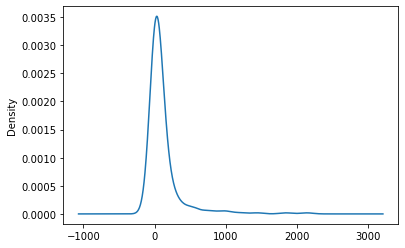

In [10]:
# Visualize the value counts
Neighbourhood_counts.plot.density()

In [11]:
# Determine which values to replace
replace_neighbours = list(Neighbourhood_counts[Neighbourhood_counts < 500].index)

# Replace in DataFrame
for neighbours in replace_neighbours:
    df.neighbourhood_cleansed = df.neighbourhood_cleansed.replace(neighbours,"Other")


# Check to make sure binning was successful
df.neighbourhood_cleansed.value_counts()

Other                 13435
Bedford-Stuyvesant     2140
Williamsburg           1844
Harlem                 1445
Bushwick               1206
Upper West Side        1033
Hell's Kitchen          985
Crown Heights           935
Upper East Side         787
Midtown                 760
East Village            724
East Harlem             576
Lower East Side         560
Chelsea                 535
Astoria                 526
Greenpoint              519
Name: neighbourhood_cleansed, dtype: int64

In [12]:
# look at Property-type value counts for bining
Property_count = df.property_type.value_counts()
Property_count

Entire rental unit                11303
Private room in rental unit        7840
Private room in home               1719
Entire home                        1230
Entire condo                       1110
                                  ...  
Shared room                           1
Shared room in vacation home          1
Cave                                  1
Shared room in casa particular        1
Tower                                 1
Name: property_type, Length: 66, dtype: int64

<AxesSubplot:ylabel='Density'>

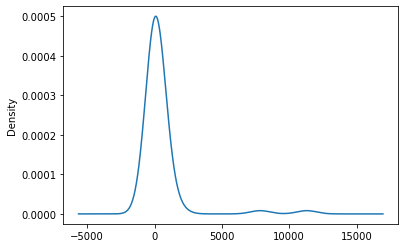

In [13]:
# Visualize the value counts of property_type
Property_count.plot.density()

In [14]:
# Determine which values to replace if counts are less than 1000
replace_property = list(Property_count[Property_count < 1000].index)

# Replace in dataframe
for property_type in replace_property:
    df.property_type = df.property_type.replace(property_type,"Other")
    
# Check to make sure binning was successful
df.property_type.value_counts()

Entire rental unit             11303
Private room in rental unit     7840
Other                           4808
Private room in home            1719
Entire home                     1230
Entire condo                    1110
Name: property_type, dtype: int64

In [15]:
# look at room-type value counts for bining
room_count = df.room_type.value_counts()
room_count

Entire home/apt    15569
Private room       11910
Shared room          400
Hotel room           131
Name: room_type, dtype: int64

<AxesSubplot:ylabel='Density'>

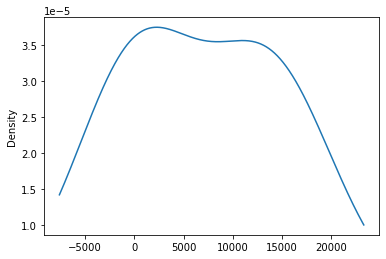

In [16]:
# Visualize the value counts of room_type
room_count.plot.density()

In [17]:
# Drop the room_type column
df.drop(columns=["room_type"], inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      28010 non-null  int64  
 1   host_id                 28010 non-null  int64  
 2   host_listings_count     28010 non-null  float64
 3   neighbourhood_cleansed  28010 non-null  object 
 4   latitude                28010 non-null  float64
 5   longitude               28010 non-null  float64
 6   property_type           28010 non-null  object 
 7   accommodates            28010 non-null  int64  
 8   bedrooms                28010 non-null  float64
 9   beds                    28010 non-null  float64
 10  minimum_nights          28010 non-null  int64  
 11  availability_30         28010 non-null  int64  
 12  number_of_reviews       28010 non-null  int64  
 13  review_scores_rating    28010 non-null  float64
 14  zip                     28010 non-null

In [19]:
# Generate our categorical variable lists
neighbour_property = df.dtypes[df.dtypes == "object"].index.tolist()

In [20]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[neighbour_property]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(neighbour_property)
encode_df.head()

,neighbourhood_cleansed_Astoria,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Chelsea,neighbourhood_cleansed_Crown Heights,neighbourhood_cleansed_East Harlem,neighbourhood_cleansed_East Village,neighbourhood_cleansed_Greenpoint,neighbourhood_cleansed_Harlem,neighbourhood_cleansed_Hell's Kitchen,...,neighbourhood_cleansed_Other,neighbourhood_cleansed_Upper East Side,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Williamsburg,property_type_Entire condo,property_type_Entire home,property_type_Entire rental unit,property_type_Other,property_type_Private room in home,property_type_Private room in rental unit
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(neighbour_property,1)
df.head()

,id,host_id,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,availability_30,...,neighbourhood_cleansed_Other,neighbourhood_cleansed_Upper East Side,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Williamsburg,property_type_Entire condo,property_type_Entire home,property_type_Entire rental unit,property_type_Other,property_type_Private room in home,property_type_Private room in rental unit
0,2539,2787,9.0,40.64529,-73.97238,2,1.0,1.0,30,21,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,5121,7356,2.0,40.68535,-73.95512,2,1.0,1.0,30,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,45910,204539,7.0,40.70309,-73.89963,16,5.0,10.0,30,30,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5136,7378,1.0,40.66265,-73.99454,4,2.0,2.0,21,0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,77765,417504,30.0,40.73777,-73.95366,2,1.0,1.0,2,15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Visulaize the data with histograms

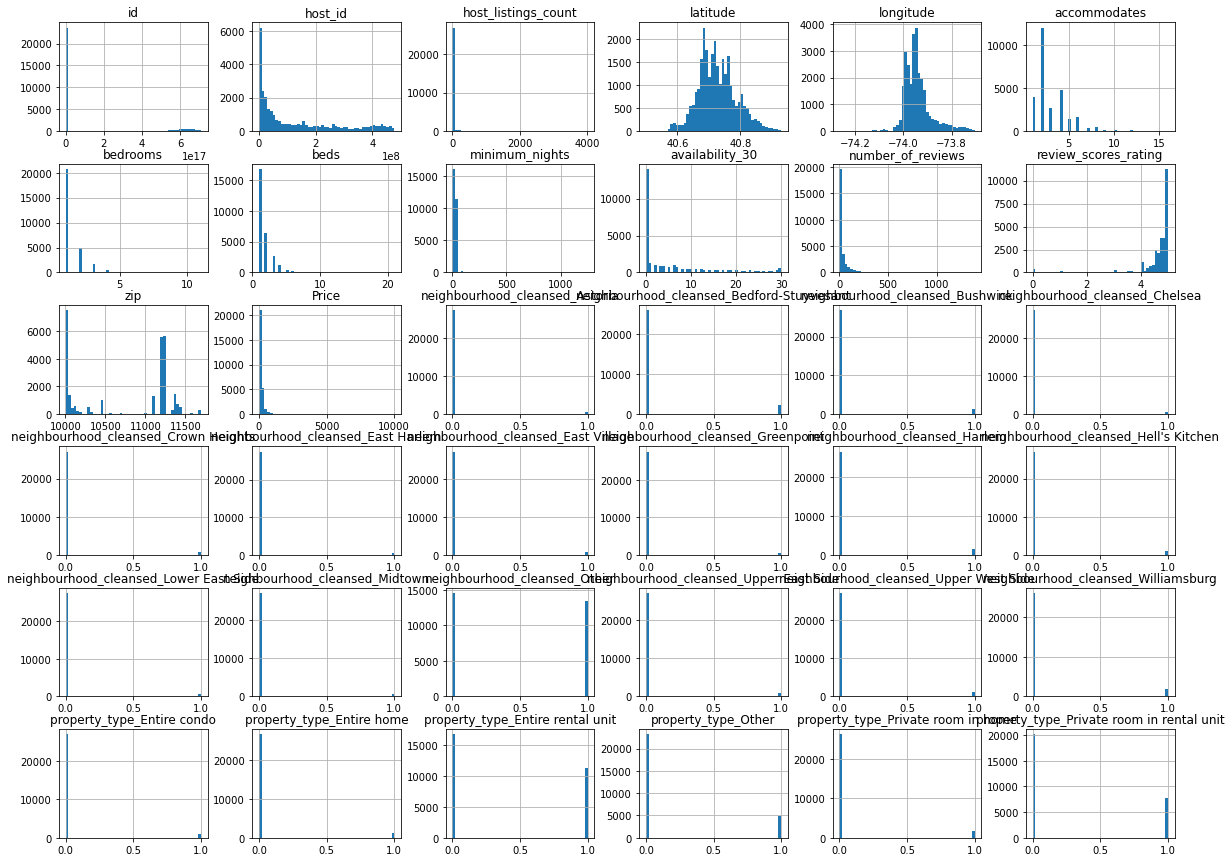

In [22]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [23]:
df.describe()

,id,host_id,host_listings_count,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,availability_30,...,neighbourhood_cleansed_Other,neighbourhood_cleansed_Upper East Side,neighbourhood_cleansed_Upper West Side,neighbourhood_cleansed_Williamsburg,property_type_Entire condo,property_type_Entire home,property_type_Entire rental unit,property_type_Other,property_type_Private room in home,property_type_Private room in rental unit
count,2.801000e+04,2.801000e+04,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,...,28010.000000,28010.000000,28010.00000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000
mean,9.721312e+16,1.275089e+08,20.631417,40.726834,-73.942411,3.032774,1.368083,1.705070,16.315494,5.697144,...,0.479650,0.028097,0.03688,0.065834,0.039629,0.043913,0.403534,0.171653,0.061371,0.279900
std,2.272339e+17,1.440062e+08,190.297166,0.060398,0.059534,1.990085,0.728067,1.168062,29.273568,8.485491,...,0.499595,0.165253,0.18847,0.247995,0.195089,0.204905,0.490615,0.377085,0.240014,0.448958
min,2.539000e+03,2.438000e+03,1.000000,40.500314,-74.266750,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.476990e+07,1.214189e+07,1.000000,40.685153,-73.981117,2.000000,1.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.447872e+07,5.466776e+07,2.000000,40.720675,-73.950880,2.000000,1.000000,1.000000,5.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.170158e+07,2.166052e+08,4.000000,40.763257,-73.922280,4.000000,2.000000,2.000000,30.000000,9.000000,...,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,7.072726e+17,4.772572e+08,4022.000000,40.928810,-73.704260,16.000000,11.000000,21.000000,1250.000000,30.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Examine correlations with the Target

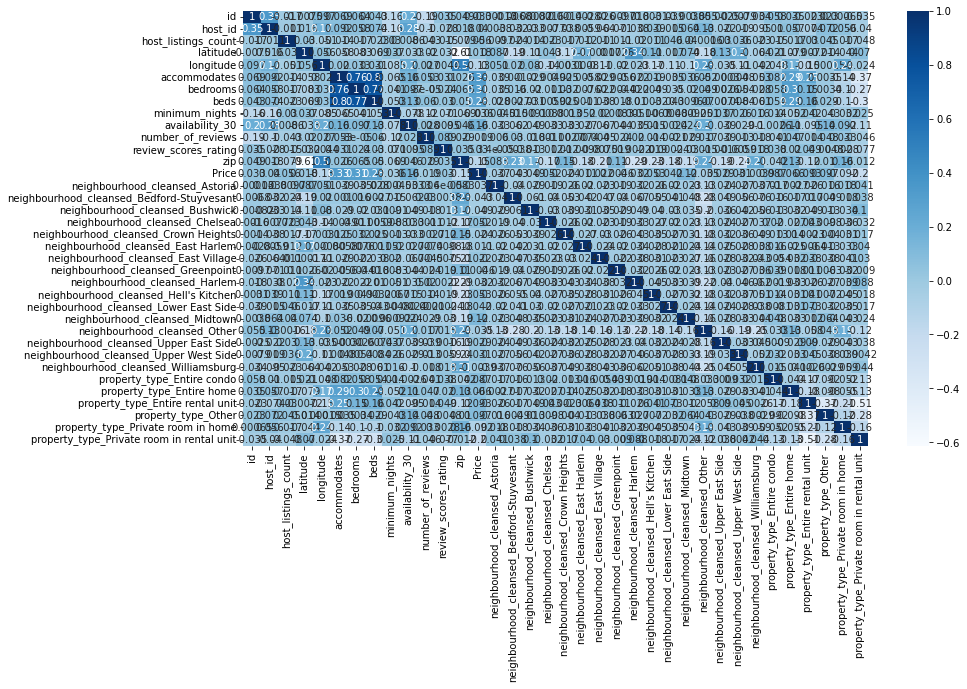

In [24]:
plt.figure(figsize=(14,8))
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues")

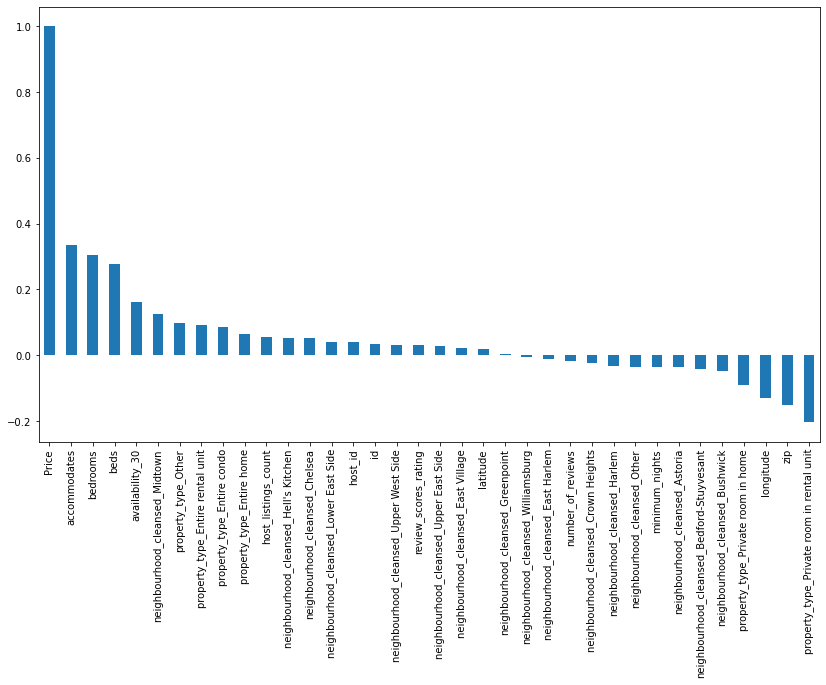

In [25]:
plt.figure(figsize=(14,8))
bars = df.corr()["Price"].sort_values(ascending=False).plot(kind='bar')

In [26]:
# Drop the id column
df.drop(columns=["id"], inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28010 entries, 0 to 28009
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   host_id                                    28010 non-null  int64  
 1   host_listings_count                        28010 non-null  float64
 2   latitude                                   28010 non-null  float64
 3   longitude                                  28010 non-null  float64
 4   accommodates                               28010 non-null  int64  
 5   bedrooms                                   28010 non-null  float64
 6   beds                                       28010 non-null  float64
 7   minimum_nights                             28010 non-null  int64  
 8   availability_30                            28010 non-null  int64  
 9   number_of_reviews                          28010 non-null  int64  
 10  review_scores_rating  

In [28]:
# Split data into our features and target arrays
y = df["Price"].values
X = df.drop(["Price"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [31]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Linear Regression

In [32]:
# Create the regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [33]:
# Make predictions from the model
y_pred = model.predict(X_test_scaled)

In [34]:
y_pred

array([281.71320329, 253.51593766,  94.89337907, ..., 356.78009782,
        25.32062516, 265.13507829])

In [35]:
# Assess performance of regression model
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))) 

RMSE:  238.84684577290784


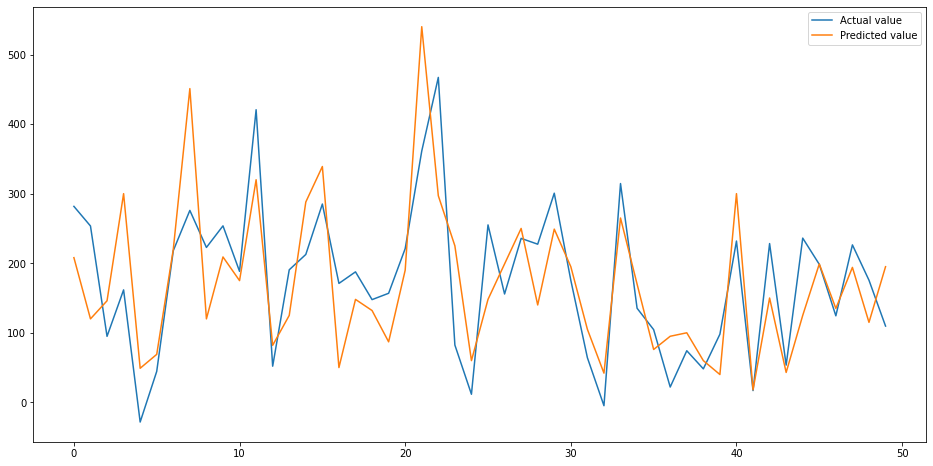

In [36]:
#Plotting predicted versus actual values
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])


## Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
rfr= RandomForestRegressor()

In [41]:
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [42]:
yPred2= rfr.predict(X_test_scaled)

In [43]:
# Assess performance of regression model
print('RMSE: ', np.sqrt(mean_squared_error(y_test, yPred2))) 

RMSE:  226.5918344516115


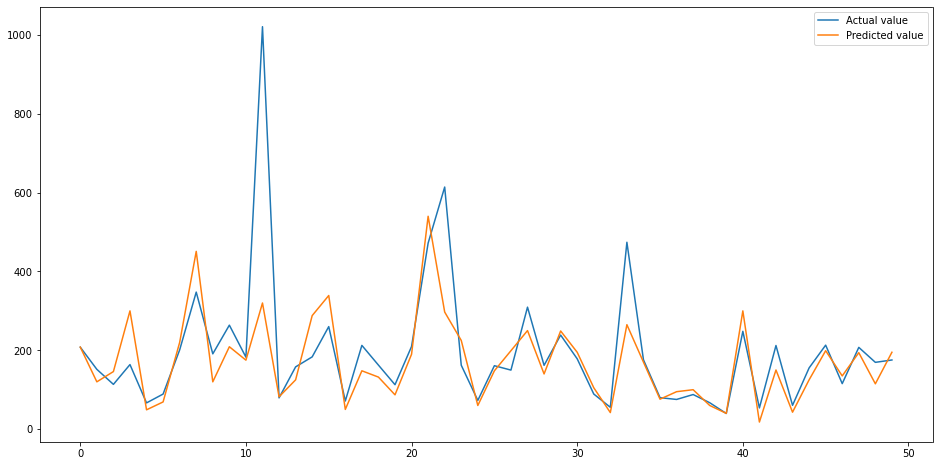

In [44]:
#Plotting predicted versus actual values
test = pd.DataFrame({'Predicted value':yPred2, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])


## Decision Tree Regressor

In [45]:
from sklearn.tree import DecisionTreeRegressor

In [46]:
dtr= DecisionTreeRegressor()

In [47]:
dtr.fit(X_train_scaled, y_train)

DecisionTreeRegressor()

In [48]:
yPred3= dtr.predict(X_test_scaled)

In [49]:
# Assess performance of regression model
print('RMSE: ', np.sqrt(mean_squared_error(y_test, yPred3))) 

RMSE:  304.12278095070195


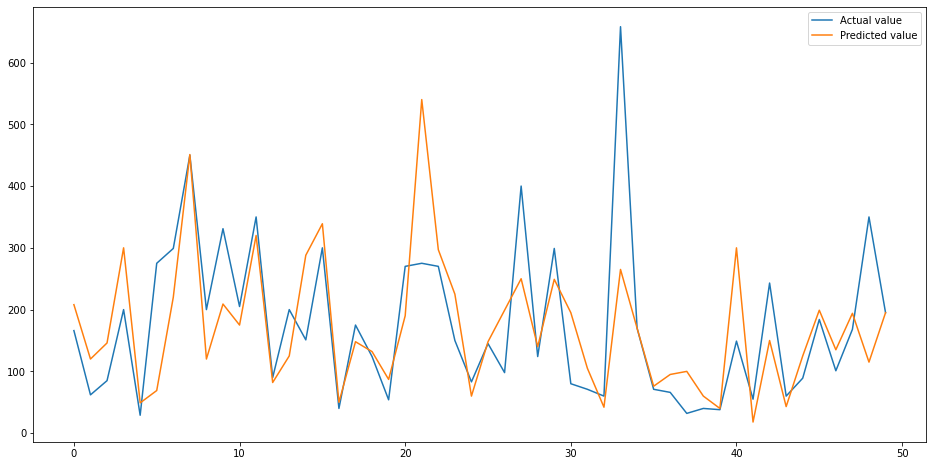

In [50]:
#Plotting predicted versus actual values
test = pd.DataFrame({'Predicted value':yPred3, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])
